Output()

<IPython.core.display.Javascript object>


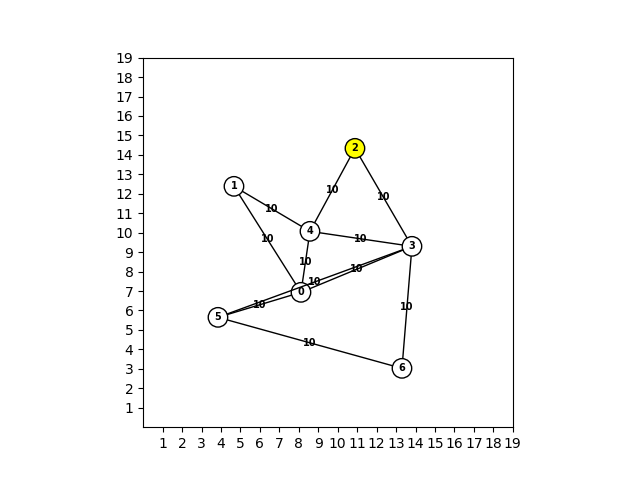

VBox()

se van a poner las aristas
se va a escoger al inicial


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from matplotlib.patches import Circle
from matplotlib.patches import PathPatch
from matplotlib.patches import Path
from matplotlib.transforms import Bbox
%matplotlib nbagg 

out1 = widgets.Output()
display(out1)
class poner_vertices: 
    vertices = dict()
    ind = 0 
    ax = None
    controles = None
    out = out1
    #conexion del mouse
    cid = None
    def __init__(self,ax,controles): 
        self.ax = ax
        self.controles = controles
    #funcion ligada a los clicks para poner los vertices 
    @out.capture()
    def onclick(self,event):
        #poner los vertices 
        c = Circle((event.xdata,event.ydata),radius = 0.5,facecolor = 'white',edgecolor = 'black')
        self.ax.add_patch(c)
        anot = ax.annotate(str(self.ind), (event.xdata, event.ydata),color='black', weight='bold', fontsize=7, ha='center', va='center')
        self.vertices[self.ind] = (c,anot)
        self.ind = self.ind + 1 
        
    def ready_button_handler(self,event):
        global estado
        fig.canvas.mpl_disconnect(self.cid)
        print("se van a poner las aristas")
        estado = poner_aristas(self.ax,self.controles,self.vertices,self.out)
        estado.main()
        
    def main(self): 
        self.cid = fig.canvas.mpl_connect('button_press_event', self.onclick)
        ready_button = widgets.Button(description='listo')
        self.controles.children = [ready_button] 
        ready_button.on_click(self.ready_button_handler)

 
        
class poner_aristas: 
    ax = None
    controles = None
    out = out1
    #conexion del mouse
    cid = None
    vert1 = None
    #el diccionario de aristas 
    #no pueden estar repetidas las tuplas 
    aristas = dict()
    global graph
    def inter_points(self,rad,x1,y1,x2,y2): 
        phi = math.atan2(y2-y1, x2-x1)
        x = x1 + rad * math.cos(phi)
        y = y1 + rad * math.sin(phi)
        return (x,y)
    def mid_point(self,p1,p2): 
        (x1,y1) = p1
        (x2,y2) = p2
        return ((x1 + x2)/2.0,(y1 + y2)/2.0)
    def __init__(self,ax,controles,vertices,out):
        self.vertices = vertices
        self.ax = ax
        self.controles = controles
        self.out = out
    def weight_choice_handler(self,change):
        u,v = eval(change.owner.description) 
        self.aristas[u][v][1].set(text = str(change.new))
    
    #funcion ligada a los clicks para poner los vertices 
    @out.capture()
    def onclick(self,event):
        #poner los vertices 
        for (v,(c,anot)) in self.vertices.items():
            x, y =  c.get_center() 
            r = c.get_radius() 
            if(math.sqrt((y - event.ydata)**2 + (x - event.xdata)**2)  <= r): 
                if(self.vert1 != None): 
                    #la segunda condición es para ver que no esté ya esa arista 
                    if(self.vert1 != v and not((self.vert1 in self.aristas and v in self.aristas[self.vert1]) or (v in self.aristas and self.vert1 in self.aristas[v]))):                     
                        #si no los han asignado 
                        xi,yi = self.vertices[self.vert1][0].get_center()
                        xj,yj = self.vertices[v][0].get_center()
                        #anade la linea 
                        linea = PathPatch(Path([self.inter_points(0.5,xi,yi,xj,yj),self.inter_points(0.5,xj,yj,xi,yi)]), facecolor='none', edgecolor='black')
                        ax.add_patch(linea)
                        #añade la anotacion
                        anot = ax.annotate("10",self.mid_point(self.vertices[self.vert1][0].get_center(),self.vertices[v][0].get_center()),color='black', weight='bold', fontsize=7, ha='center', va='center')
                        if(self.vert1 not in self.aristas): 
                            self.aristas[self.vert1] = dict()
                        self.aristas[self.vert1][v] = (linea,anot)
                        if(v not in self.aristas ): 
                            self.aristas[v] = dict()
                        self.aristas[v][self.vert1] = (linea,anot)
                        self.vertices[self.vert1][0].set(facecolor='white')
                        #agregar el widget para obtener el peso 
                        weight_choice = widgets.BoundedIntText(value=10,min=0,max=20,step=1,description='({},{})'.format(self.vert1,v),disabled=False)
                        weight_choice.observe(self.weight_choice_handler, names='value')
                        widget_list = list(self.controles.children)
                        widget_list.append(weight_choice)
                        self.controles.children = tuple(widget_list)
                        self.vert1 = None
                    else: 
                        self.vertices[self.vert1][0].set(facecolor='white')
                        self.vert1 = None
                else: 
                    c.set(facecolor = 'red')
                    self.vert1 = v 
    
    def ready_button_handler(self,event):
        global estado
        fig.canvas.mpl_disconnect(self.cid)
        print("se va a escoger al inicial")
        estado = escoger_inicial(self.ax,self.controles,self.vertices)
        estado.main()
        
    def main(self): 
        self.cid = fig.canvas.mpl_connect('button_press_event', self.onclick)
        ready_button = widgets.Button(description='listo')
        self.controles.children = [ready_button]
        ready_button.on_click(self.ready_button_handler)
        
class escoger_inicial:
    ax = None
    controles = None
    out = out1 
    vertices = [] 
    inicial = 0 
    def __init__(self,ax,controles,vertices): 
        self.ax = ax
        self.controles = controles 
        self.vertices = vertices 
        #pone el inicial como el 0 
        self.vertices[0][0].set(facecolor = 'yellow')
    @out.capture()
    def onclick(self,event):
        for (v,(c,anot)) in self.vertices.items():
            x, y =  c.get_center() 
            r = c.get_radius() 
            if(math.sqrt((y - event.ydata)**2 + (x - event.xdata)**2)  <= r): 
                    self.vertices[self.inicial][0].set(facecolor = 'white')
                    self.inicial = v 
                    c.set(facecolor = 'yellow')
    def main(self): 
        self.cid = fig.canvas.mpl_connect('button_press_event', self.onclick)
        ready_button = widgets.Button(description='listo')
        self.controles.children = [ready_button]
        ready_button.on_click(self.ready_button_handler)
    def ready_button_handler(self,event):
        global estado
        fig.canvas.mpl_disconnect(self.cid)
        print("se va a ejecutar dijkstra")
        #estado = poner_aristas(self.ax,self.controles,self.vertices,self.out)
        #estado.main() 
class ejecutar_dijstra: 

    def __init__(self,graph,vertices,aristas): 
        self.graph = graph 
        self.vertices = vertices 
        self.arists = aristas 
        self.heap = []
        self.visitados = dict()
        self.padre = [-1 for i in range(0,len(vertices))]
        
    def takeSecond(self,elem):
        return elem[1]

    def next_button_handler(self,event):
        if not self.heap: 
            return
        #sacar del heap 
        self.heap.sort(key=self.takeSecond)
        #vertice con distancia 
        (i,d) = heap[0]
        heap.pop(0)
        visitados.append(i)
        """
        self.vertices[i][0].set(facecolor = 'red')
        if self.padre[i] != -1: 
            self.aristas[i][padre[i]][0].set(color = 'red')
        for (j,w) in self.graf[i]:  
            if j in self.visitados:
                continue
            if not j in dist: 
                self.heap.append((j,dist[i] + w)) 
                #graf_rep[j][0].set(facecolor = 'orange')
                #graf_rep[j][2].set(text = str(dist[i] + w))
                padre[j] = i
                #graf_rep[j][1][padre[j]].set(color = 'orange')
                dist[j] = dist[i] + w
            elif dist[i] + w < dist[j]: 
                heap.remove((j,dist[j]))
                #eliminarlo del heap 
                dist[j] = dist[i] + w
                heap.append((j,dist[j])) 
                #graf_rep[j][0][2].set(text = str(dist[i] + w))
                #graf_rep[j][1][padre[j]].set(color = 'black')
                #pintar el anterior de negro si tiene
                padre[j] = i 
                #graf_rep[j][1][padre[j]].set(color = 'orange')
        #return (graf,dist,heap,visitados) 
            #estado.main() 
        """
    def main(self): 
        next_button = widgets.Button(description='siguiente')
        self.controles.children = [next_button]
        next_button.on_click(self.next_button_handler)
    
    
    
fig, ax = plt.subplots()
maxim_x = 20
maxim_y = 20
plt.xticks(range(1,maxim_x))
plt.yticks(range(1,maxim_y))
plt.gca().set_aspect('equal', adjustable='box')
box = widgets.VBox([])
display(box)
estado = poner_vertices(ax,box)
estado.main()
#la grafica es una variable global 
graph = None 
